***Artificial Intelligence - Assigment No.2 - Supervised Learning***


**About the Dataset**

The dataset that we are going to use in this project is the "BCCC-cPacket-Cloud-DDoS-2024", a cybersecurity dataset to train, test and analyze cybersecurity models. It includes an equal number of malicious and benign DoH(Domain Over HTTP) network traffic instances, with 249,836 instances in each category. It has 28 attributes, all of them being numeric-valued measurements, regarding the packets length, response time, byte flow, etc. And the last one, Label, which labels the packet as Benign or Malicious.

**About the Problem**

Domain Name System is one of the earliest and most vulnerable network protocols, having several security loopholes. Because of that, it has always been an area of great concern for cybersecurity researches. To overcome some of the DoH problems and vulnerabilities, our model will help us undestand in a better/deeper way what makes a packet benign or malicious. So this is a binary classification problem where the target variable is the label of benign or malicious being applied to a DoH packet.

**About the Solution**

The solution to this problem was a supervised learning model, we split the above mentioned dataset into a training part
(70%) and a testing part(30%). The model will be evaluated using the x1, x2, x3 metrics.


**Importing Libraries**

To start, we need to install all the libraries that are going to be used in this project. They are all located in the "requirements.txt" file and can be easily installed with the command below:

	pip install -r requirements.txt

In [83]:
import os
import sys
import math
#!{sys.executable} -m pip install numpy
import numpy as np
#!{sys.executable} -m pip install pandas
import pandas as pd
#!{sys.executable} -m pip install matplotlib
import matplotlib.pyplot as plt
#!{sys.executable} -m pip install seaborn
import seaborn as sb
#!{sys.executable} -m pip install scikit-learn
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, validation_curve, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, BaggingClassifier
from scipy import stats
import time
!{sys.executable} -m pip install imblearn
from imblearn.over_sampling import SMOTE


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


**Loading the dataset with pandas module**

In [97]:
df = pd.read_csv('archive\\BCCC-CIRA-CIC-DoHBrw-2020.csv')
df.head()

,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,PacketLengthVariance,PacketLengthStandardDeviation,PacketLengthMean,PacketLengthMedian,PacketLengthMode,PacketLengthSkewFromMedian,...,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation,Label
0,353,80.890348,393,90.056393,469.209877,21.661253,82.888889,66.0,66,2.339046,...,0.534524,1.754601e-09,0.000042,0.000048,0.000019,0.000017,2.028699,0.737490,0.869641,Benign
1,1807,53.056709,4828,141.758602,145520.370987,381.471324,228.793103,76.0,68,1.201609,...,1.591559,5.348911e-05,0.007314,0.011523,0.015273,0.000016,-1.538407,1.573304,0.634722,Malicious
2,15000,479.536009,27719,886.150575,25949.480963,161.088426,135.186709,87.0,87,0.897396,...,0.670950,3.356292e-01,0.579335,0.139518,0.001976,0.000003,0.712241,0.240819,4.152404,Malicious
3,1755,58.193065,4617,153.125406,154088.445853,392.541007,245.112953,75.5,54,1.296268,...,2.029971,1.245935e+02,11.162146,5.011613,0.015778,0.012884,1.342708,0.447829,2.227258,Benign
4,618,3.491495,315,1.779646,319.410000,17.872045,93.300000,105.0,105,-1.963961,...,0.816362,2.975575e-09,0.000054,0.015507,0.015471,0.015466,1.986391,0.751146,0.003502,Benign


# **Data Preprocessing**

Before applying our data to the algorithm, we must first check if there is any transformations we can do to make our dataset cleaner and more optimized. First of, we are going to check if there is any entry in the dataset that contains a null value in any of the attributes.

In [98]:
# Checking for NA values, that is, missing/empty values.
df.isna().sum() 

FlowBytesSent                             0
FlowSentRate                              0
FlowBytesReceived                         0
FlowReceivedRate                          0
PacketLengthVariance                      0
PacketLengthStandardDeviation             0
PacketLengthMean                          0
PacketLengthMedian                        0
PacketLengthMode                          0
PacketLengthSkewFromMedian                0
PacketLengthSkewFromMode                  0
PacketLengthCoefficientofVariation        0
PacketTimeVariance                        0
PacketTimeStandardDeviation               0
PacketTimeMean                            0
PacketTimeMedian                          0
PacketTimeMode                            0
PacketTimeSkewFromMedian                  0
PacketTimeSkewFromMode                    0
PacketTimeCoefficientofVariation          0
ResponseTimeTimeVariance                  0
ResponseTimeTimeStandardDeviation         0
ResponseTimeTimeMean            

As we can see, no missing values were found.

### Data analysis

In order to get an overview of our dataset and check for any outliers, we are going to use df.dataset().

In [86]:
df.describe()

,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,PacketLengthVariance,PacketLengthStandardDeviation,PacketLengthMean,PacketLengthMedian,PacketLengthMode,PacketLengthSkewFromMedian,...,PacketTimeSkewFromMode,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation
count,4.991060e+05,4.991060e+05,4.991060e+05,4.991060e+05,4.991060e+05,499106.000000,499106.000000,499106.000000,499106.000000,499106.000000,...,499106.000000,499106.000000,499106.000000,499106.000000,499106.000000,499106.000000,499106.000000,499106.000000,499106.000000,499106.000000
mean,4.020093e+04,4.733915e+04,4.250156e+04,3.166829e+04,9.263585e+04,220.169083,173.159814,95.472702,70.749953,0.442934,...,1.246052,0.972995,1.711825,0.319586,0.442021,0.394671,0.205894,-0.968984,-0.060800,1.114611
std,1.439617e+05,4.212751e+05,1.393927e+05,2.566805e+05,1.534938e+05,210.141825,85.506490,32.999740,14.830277,1.551998,...,0.713803,0.520212,11.106412,1.244031,2.071807,2.351233,1.724873,3.163775,3.198770,1.735820
min,5.500000e+01,1.464903e+00,5.400000e+01,1.576245e+00,0.000000e+00,0.000000,56.000000,54.000000,54.000000,-10.000000,...,-5.265523,0.077182,0.000000,0.000000,0.000005,0.000002,-0.000001,-10.000000,-10.000000,0.000000
25%,6.180000e+02,5.410781e+01,4.760000e+02,1.418128e+02,4.692099e+02,21.661253,92.000000,76.000000,66.000000,0.199848,...,0.627988,0.577836,0.000021,0.004454,0.010538,0.012238,0.000016,-1.797168,0.393686,0.552687
50%,1.807000e+03,3.640969e+02,4.827000e+03,4.611146e+02,1.826789e+04,135.142971,152.488283,87.000000,68.000000,0.986397,...,1.224949,0.748184,0.000079,0.008820,0.015148,0.015407,0.000034,0.000000,0.908002,0.800649
75%,5.542000e+03,3.810260e+03,7.888000e+03,4.215498e+03,1.415989e+05,376.296309,228.758621,105.000000,68.000000,1.201609,...,1.716577,1.516263,0.000357,0.018640,0.024903,0.016300,0.015161,0.936908,1.305393,1.208105
max,8.015359e+06,2.304348e+07,7.723184e+06,7.600000e+06,1.578115e+06,1256.230616,689.800000,317.000000,553.000000,2.932375,...,12.956406,5.616085,647.245330,25.441017,28.017596,28.017596,28.017596,2.970716,5.428781,66.309747


After carefully observing this table, we can see that some attributes may have outliers, due to their standard deviation (std) value. To better check for outliers, we can can use boxplots and find some of the attributes that seem to have them.

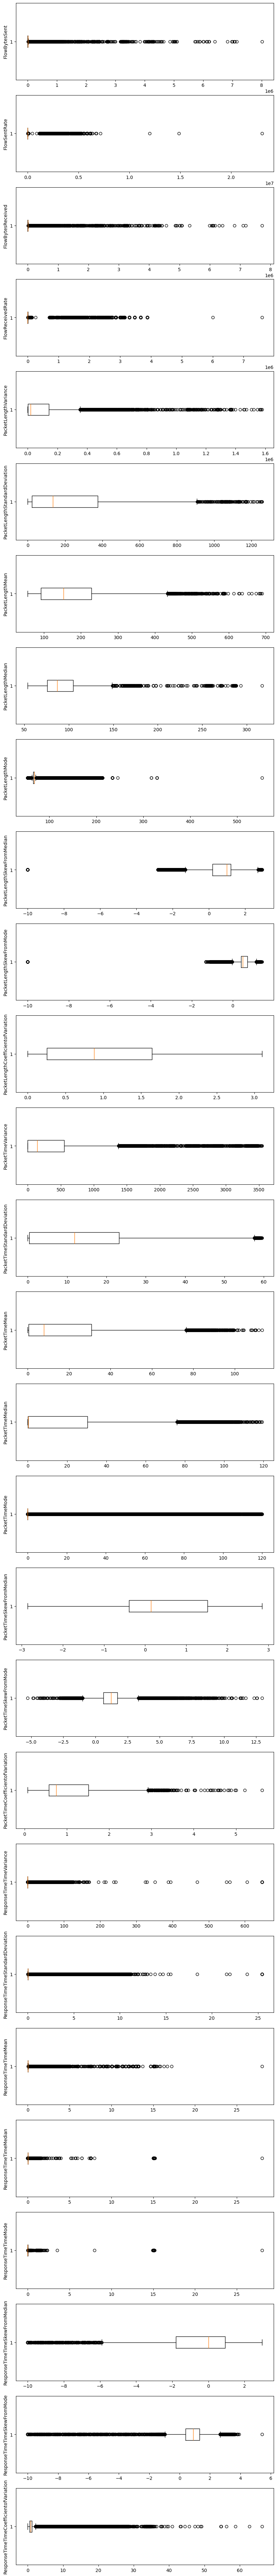

In [87]:
fig, axs = plt.subplots(28,1,dpi=100, figsize=(10,100))
i = 0
for col in df.columns:
    if (col != "Label"):
        axs[i].boxplot(df[col], vert=False)
        axs[i].set_ylabel(col)
    i+=1
plt.show()

As we can see, our dataset has a big number of attributes that contain a lot of outliers. This is probably caused by the large ammount of entries that our dataset contains, since it has about 500 000 rows. In that case, to make it more balanced, we need to reduce it greatly and get rid of the more extreme outliers. In order to do that, we use a method that removes rows based on their relation between the mean value and the standard deviation of a given column. But first, we need to make sure that all values in the dataset are numerical.

### Discretization

In order to do certain operations on a dataset, we must make sure that every attribute is ordinal. However, our dataset contains an atribute "Label", which is not ordinal. Because of that, we have to encode both "Benign" and "Malicious" to an ordinal value.

In [99]:
encoder = LabelEncoder()

df['Label'] = encoder.fit_transform(df['Label'])
df.head()

,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,PacketLengthVariance,PacketLengthStandardDeviation,PacketLengthMean,PacketLengthMedian,PacketLengthMode,PacketLengthSkewFromMedian,...,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation,Label
0,353,80.890348,393,90.056393,469.209877,21.661253,82.888889,66.0,66,2.339046,...,0.534524,1.754601e-09,0.000042,0.000048,0.000019,0.000017,2.028699,0.737490,0.869641,0
1,1807,53.056709,4828,141.758602,145520.370987,381.471324,228.793103,76.0,68,1.201609,...,1.591559,5.348911e-05,0.007314,0.011523,0.015273,0.000016,-1.538407,1.573304,0.634722,1
2,15000,479.536009,27719,886.150575,25949.480963,161.088426,135.186709,87.0,87,0.897396,...,0.670950,3.356292e-01,0.579335,0.139518,0.001976,0.000003,0.712241,0.240819,4.152404,1
3,1755,58.193065,4617,153.125406,154088.445853,392.541007,245.112953,75.5,54,1.296268,...,2.029971,1.245935e+02,11.162146,5.011613,0.015778,0.012884,1.342708,0.447829,2.227258,0
4,618,3.491495,315,1.779646,319.410000,17.872045,93.300000,105.0,105,-1.963961,...,0.816362,2.975575e-09,0.000054,0.015507,0.015471,0.015466,1.986391,0.751146,0.003502,0


By encoding the label values, we now have "Malicious" mapped to 1, and "Benign" mapped to 0.

### Removing outliers

Now that we turned every attribute into an ordinal attribue, we can use our method to eliminate outliers.

In [100]:
print("Dataset size before removing outliers: ", len(df.index))
z_scores = np.abs(stats.zscore(df))
outlier_indices = df[(z_scores >= 2).any(axis=1)].index
df = df.drop(index=outlier_indices)
print("Dataset size after removing outliers: ", len(df.index))

Dataset size before removing outliers:  499106
Dataset size after removing outliers:  268525


After removing the major outliers we are left with about 270 000 entries.

### Correlated attributes

Currently our dataset has 28 attributes. We want to optimize it so that we can use it more efectively during the model training. To achieve that, we can find attributes that have a high correlation between themselves, since they could be merged into a single attribute. By checking every pair of columns and verifying if they have a correlation above 95%, we can infer if our dataset contains any highly correlated attributes.

In [103]:
df_copy = df.copy()
cols = list(df_copy.columns)

feature_cols = 0

corr_attr = []

for i, col1 in enumerate(cols):
    for col2 in cols[i::]:
        if col1 == col2:
            continue
        if math.fabs(df_copy[col1].corr(df_copy[col2])) > 0.95:
            feature_cols += 1
            corr_attr.append([col1, col2])
            
print(f'Found {feature_cols} highly correlated attributes!')
for j in corr_attr:
    print(j)

Found 5 highly correlated attributes!
['PacketLengthVariance', 'PacketLengthStandardDeviation']
['PacketLengthStandardDeviation', 'PacketLengthMean']
['PacketLengthStandardDeviation', 'PacketLengthCoefficientofVariation']
['PacketTimeMean', 'PacketTimeMedian']
['ResponseTimeTimeStandardDeviation', 'ResponseTimeTimeMean']


As we can see from the result of the code above, our dataset has four highly correlated attributes. Those are: `PacketLengthVariance - PacketLengthStandardDeviation`, `PacketLengthStandardDeviation - PacketLengthMean` , `PacketLengthStandardDeviation - PacketLengthCoefficientofVariation`, `PacketTimeMean - PacketTimeMedian` and `ResponseTimeTimeStandardDeviation - ResponseTimeTimeMean` .

To better observe these correlations, we can build scatter plots. If both attributes are highly correlated, then the plot should display a straight line.

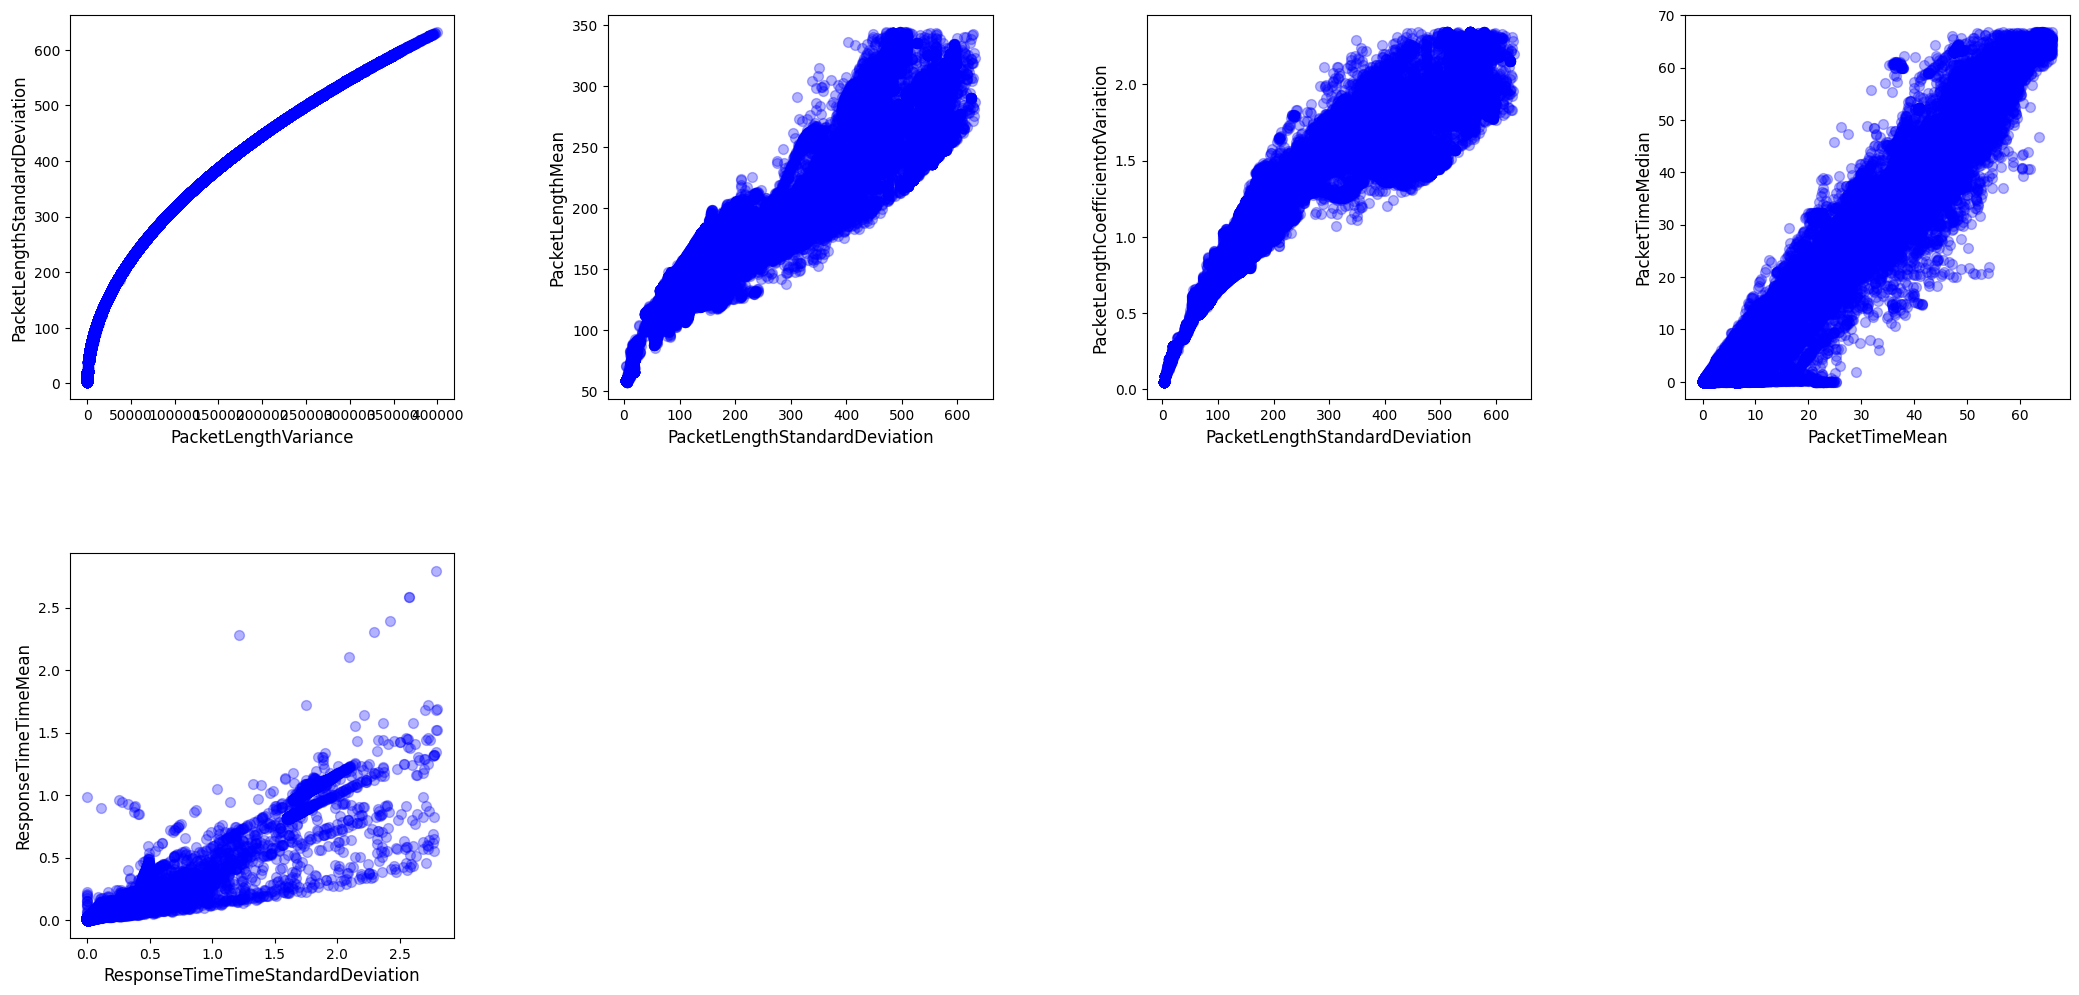

In [104]:
plt.figure(figsize=(25,25))
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)

for i, cols in enumerate(corr_attr):
    plt.subplot(4,4,i+1)
    plt.scatter(df[cols[0]],df[cols[1]],s=50,c='blue',alpha=0.3)
    plt.xlabel(f"{cols[0]}",fontsize=12)
    plt.ylabel(f"{cols[1]}",fontsize=12)

From looking at these scatter plots we can observe that these pairs of attributes are in fact highly correlated.

**Merging columns**

Now that we found our correlated attributes, we can merge them together. That way, we have a smaller ammount of columns, without damaging the quality of our dataset.

In [12]:
df_merge = df.copy()

drop_correlated = ['PacketLengthVariance', 'PacketLengthStandardDeviation', 'PacketLengthMean', 'PacketLengthStandardDeviation', 'PacketLengthCoefficientofVariation', 'PacketTimeMean', 
'PacketTimeMedian', 'ResponseTimeTimeStandardDeviation', 'ResponseTimeTimeMean']

df_merge['PacketLengthVariance/PacketLengthStandardDeviation'] = df_merge['PacketLengthVariance'] / df_merge['PacketLengthStandardDeviation']
df_merge['PacketLengthStandardDeviation/PacketLengthMean'] = df_merge['PacketLengthStandardDeviation'] / df_merge['PacketLengthMean']
df_merge['PacketLengthStandardDeviation/PacketLengthCoefficientofVariation'] = df_merge['PacketLengthStandardDeviation'] / df_merge['PacketLengthCoefficientofVariation']
df_merge['PacketTimeMean/PacketTimeMedian'] = df_merge['PacketTimeMean'] / df_merge['PacketTimeMedian']
df_merge['ResponseTimeTimeStandardDeviation/ResponseTimeTimeMean'] = df_merge['ResponseTimeTimeStandardDeviation'] / df_merge['ResponseTimeTimeMean']

df_merge = df_merge.drop(columns=drop_correlated)

df_merge.head()

,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,PacketLengthMedian,PacketLengthMode,PacketLengthSkewFromMedian,PacketLengthSkewFromMode,PacketTimeVariance,PacketTimeStandardDeviation,...,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation,Label,PacketLengthVariance/PacketLengthStandardDeviation,PacketLengthStandardDeviation/PacketLengthMean,PacketLengthStandardDeviation/PacketLengthCoefficientofVariation,PacketTimeMean/PacketTimeMedian,ResponseTimeTimeStandardDeviation/ResponseTimeTimeMean
284390,498,118.205715,353,83.788388,78.0,66,0.986397,0.884515,3.685505,1.919767,...,0.000016,1.723480,0.583053,1.715083,0,21.593749,0.253746,85.100000,0.701135,1.715083
3913,73474,821.241580,105077,1174.883013,123.0,66,0.803931,0.637342,602.060512,24.272373,...,0.000010,0.718965,0.405602,2.474548,0,154.348756,0.938813,164.336144,2.015178,2.480932
149474,2315,4358.897555,4665,8783.696368,74.0,66,1.201408,0.421663,0.044078,0.209937,...,0.000029,-0.692745,0.958637,1.071320,0,377.460453,1.676400,225.161290,2.025203,1.111913
214239,30357,1581.822986,35835,1843.596521,123.0,66,0.714780,0.713818,44.469524,6.453852,...,0.009164,-0.488757,0.409909,0.835747,0,120.452514,0.793907,151.040023,1.031910,0.829242
280261,432,102.820555,353,84.017722,90.0,66,-0.383142,0.975735,3.878561,1.969406,...,0.000014,1.723318,0.583161,1.714769,0,21.749982,0.249363,87.222222,0.667932,1.714769


In [93]:
print(df_merge.isnull().sum())

FlowBytesSent                                                       0
FlowSentRate                                                        0
FlowBytesReceived                                                   0
FlowReceivedRate                                                    0
PacketLengthMedian                                                  0
PacketLengthMode                                                    0
PacketLengthSkewFromMedian                                          0
PacketLengthSkewFromMode                                            0
PacketTimeVariance                                                  0
PacketTimeStandardDeviation                                         0
PacketTimeMode                                                      0
PacketTimeSkewFromMedian                                            0
PacketTimeSkewFromMode                                              0
PacketTimeCoefficientofVariation                                    0
ResponseTimeTimeVari

After merging four pairs of columns into four new columns, we were able to decrease the ammount of attributes in our dataset from 29 to 26, making it easier to precess and train.

# Preparing dataset for training

In this section, we will be focusing on preparing our dataset for training. Firstly, we need to separate the attributes from their respective labels.

In [94]:
attributes = df_merge.drop(['Label'], axis=1)
labels = df['Label']

# np.unique(labels, return_counts=True)

Having now two separate sets, we can create training and testing sets, using the *train_test_split* method from the *sklearn* library.  We after balance the training_dataset using the SMOTE.

In [106]:
# Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

X_train, X_test, y_train, y_test = train_test_split(attributes, labels, test_size=0.25)
X_train, y_train = SMOTE(random_state=42).fit_resample(X_train, y_train)

train_pos, train_neg = y_train.value_counts(1)
print("Train Labels:", y_train.count())
print("Benign:", train_pos, "- Malicious:", train_neg)
test_pos, test_neg = y_test.value_counts(1)
print("Test Labels:", y_test.count())
print("Benign:", test_pos, "- Malicious:", test_neg)

Train Labels: 212100
Benign: 0.5 - Malicious: 0.5
Test Labels: 67132
Benign: 0.5265596138950128 - Malicious: 0.4734403861049872


Having created a train and test set, we are now all set for model training.

# Model Training

## ToDo

-----------------------------------------------------

In [20]:
print(X_train.isnull().sum())
print(y_train.isnull().sum())

FlowBytesSent                                                       0
FlowSentRate                                                        0
FlowBytesReceived                                                   0
FlowReceivedRate                                                    0
PacketLengthMedian                                                  0
PacketLengthMode                                                    0
PacketLengthSkewFromMedian                                          0
PacketLengthSkewFromMode                                            0
PacketTimeVariance                                                  0
PacketTimeStandardDeviation                                         0
PacketTimeMode                                                      0
PacketTimeSkewFromMedian                                            0
PacketTimeSkewFromMode                                              0
PacketTimeCoefficientofVariation                                    0
ResponseTimeTimeVari

C:\Users\victo\AppData\Local\Temp\ipykernel_18852\2014067061.py:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(alg_results, labels=names)


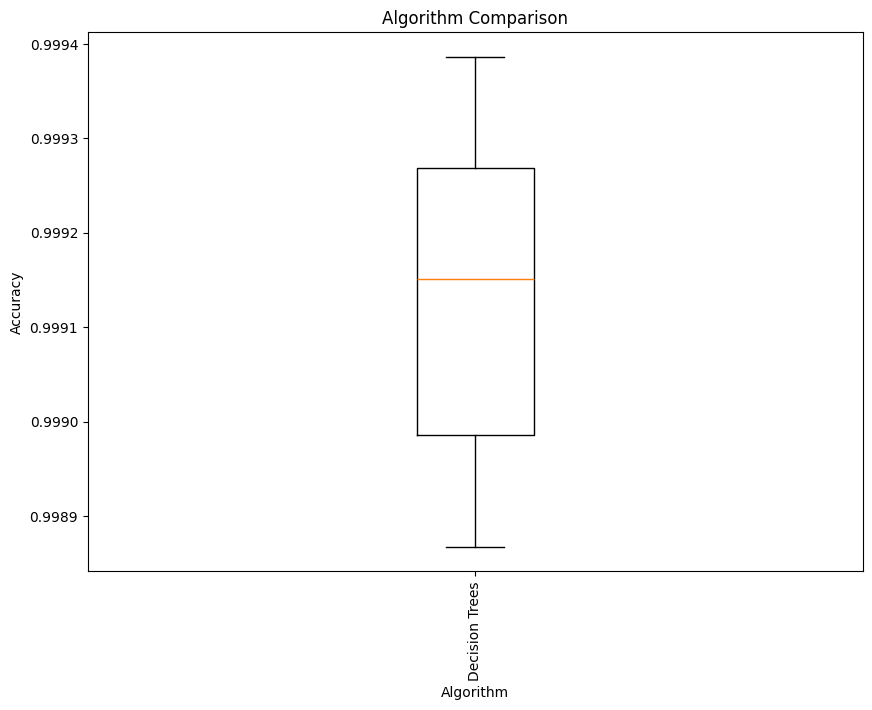

In [21]:
algorithms = []

algorithms.append(('Decision Trees', DecisionTreeClassifier()))
algorithms.append(('Neural Network Classifier', MLPClassifier()))
algorithms.append(('Neural Algorithm Regressor', MLPRegressor()))
algorithms.append(('K Nearest Neighbors', KNeighborsClassifier()))
algorithms.append(('Support Vector Machines', SVC()))
algorithms.append(('Naive Baies', GaussianNB()))
algorithms.append(('Gradient Boosting Classifier', GradientBoostingClassifier()))
algorithms.append(('Random Forest', RandomForestClassifier()))
algorithms.append(('Bagging', BaggingClassifier()))

alg_results = []
names = []
scoring = "accuracy"

for name, algorithm in algorithms:
    k_fold = KFold(n_splits=10, random_state=78, shuffle=True)
    cv_results = cross_val_score(algorithm, X_train, y_train, cv=k_fold, scoring=scoring)
    alg_results.append(cv_results)
    names.append(name)

plt.figure(figsize=(10,7))
plt.boxplot(alg_results, labels=names)
plt.title('Algorithm Comparison')

# swap the axes
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)

plt.show()
